I.Import necessary module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.colors import LinearSegmentedColormap

II.Load dataset

In [4]:
df=pd.read_csv('Carbon_(CO2)_Emissions_by_Country.csv')

III. Basic Analysis

1. Color bar settings


In [234]:
color=sns.color_palette(['#ffb7cc','#ff92b3','#ff5c8d','#CC1C39','#A51935','#731536','#541033','#3D0D35','#200B31','#000000'],as_cmap=True)
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap',color)

2.General Visualization Settings

In [133]:
plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['figure.autolayout']=True
plt.rcParams['axes.titlesize']=16
plt.rcParams['figure.titlesize']=20
plt.rcParams['axes.labelsize']=12
plt.rcParams['axes.spines.top'] = False   
plt.rcParams['axes.spines.right'] = False 
plt.rcParams['axes.spines.left'] = False  
plt.rcParams['axes.spines.bottom'] = False 
plt.rcParams['font.family']='Palatino Linotype'

3.Preliminary review of the data.

In [136]:
df.head()

,country,region,date,kilotons_of_co2,metric_tons_per_capita,year
0,Afghanistan,Asia,2011-01-01,8930.0,0.31,2011
1,Afghanistan,Asia,2012-01-01,8080.0,0.27,2012
2,Afghanistan,Asia,2010-01-01,7110.0,0.25,2010
3,Afghanistan,Asia,2019-01-01,6080.0,0.16,2019
4,Afghanistan,Asia,2018-01-01,6070.0,0.17,2018


In [137]:
shape=df.shape
print(f'This dataset contains {shape[0]} rows and {shape[1]} columns')

This dataset contains 5677 rows and 6 columns


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   country                 5677 non-null   object        
 1   region                  5677 non-null   object        
 2   date                    5677 non-null   datetime64[ns]
 3   kilotons_of_co2         5677 non-null   float64       
 4   metric_tons_per_capita  5677 non-null   float64       
 5   year                    5677 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 244.1+ KB


In [141]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,5677,2004-07-17 20:37:34.993834880,1990-01-01 00:00:00,1997-01-01 00:00:00,2005-01-01 00:00:00,2012-01-01 00:00:00,2019-01-01 00:00:00,NaN
kilotons_of_co2,5677.0,141229.164974,0.0,1380.0,9170.0,58480.0,10707219.73,649125.822199
metric_tons_per_capita,5677.0,4.325505,0.0,0.57,2.36,6.34,47.65,5.503834
year,5677.0,2004.543421,1990.0,1997.0,2005.0,2012.0,2019.0,8.643419


In [142]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

6.Working with dates

In [145]:
df['date']=pd.to_datetime(df['date'],format='mixed')
df['year']=df['date'].dt.year

In [148]:
cat_column=df.select_dtypes(include='object').columns
num_column=df.select_dtypes(exclude='object').columns

In [149]:
df[cat_column].nunique()

country    190
region       5
dtype: int64

In [150]:
df.columns

Index(['country', 'region', 'date', 'kilotons_of_co2',
       'metric_tons_per_capita', 'year'],
      dtype='object')

In [152]:
df.columns=df.columns.str.lower()
df.columns=df.columns.str.replace(' ','_')

4.Working Nan values

In [154]:
null_values=df.isnull().sum()
print(f'This dataset contains {null_values} NaN values')

This dataset contains country                   0
region                    0
date                      0
kilotons_of_co2           0
metric_tons_per_capita    0
year                      0
dtype: int64 NaN values


5.Work with dupllicates

In [160]:
dupllic_val=df.duplicated().sum()
print(f'This dataset contains {dupllic_val} duplicates')

This dataset contains 0 duplicates


Correlation between numeric values

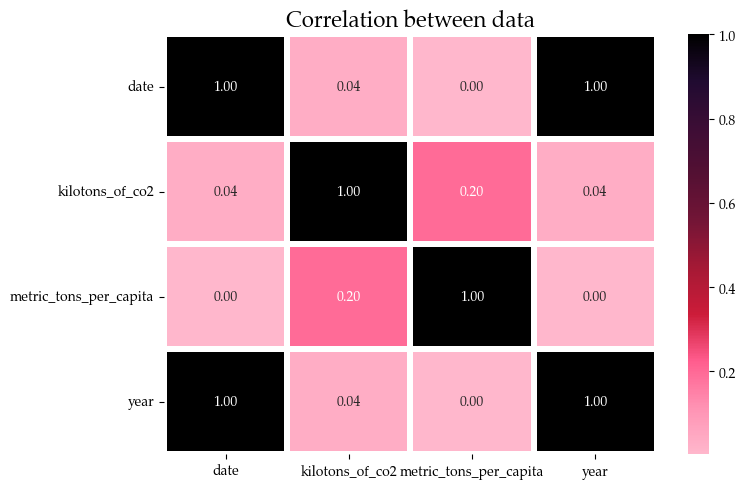

In [236]:
heatmap_corr=df[num_column].corr()
sns.heatmap(data=heatmap_corr,annot=True,fmt='1.2f',linewidths=3,linecolor='w',cmap=custom_cmap)
plt.title('Correlation between data')
plt.show()

2.Distribution

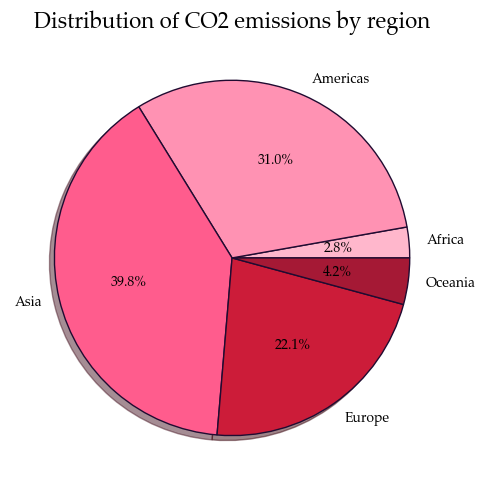

In [239]:
co2_by_region=df.groupby('region')['kilotons_of_co2'].mean().reset_index()
plt.pie(x=co2_by_region['kilotons_of_co2'],labels=co2_by_region['region'],autopct='%1.1f%%',colors=color[0:5],shadow=True,
        wedgeprops={"linewidth": 1, "edgecolor": color[-2]})
plt.title('Distribution of CO2 emissions by region')
plt.show()

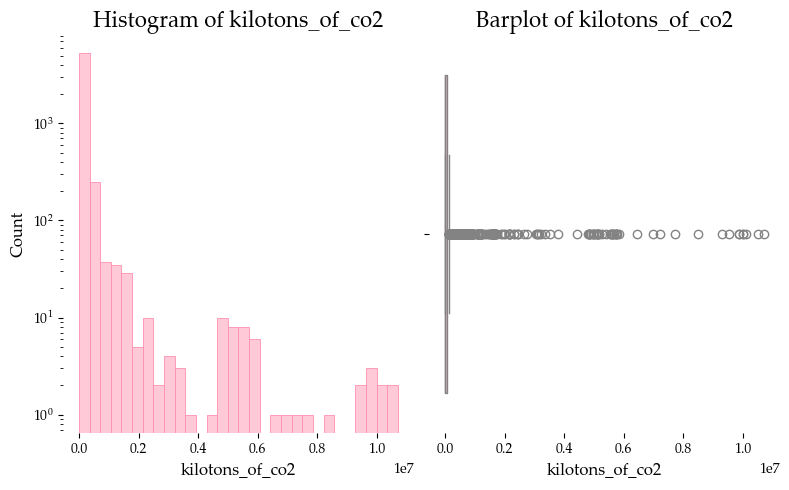

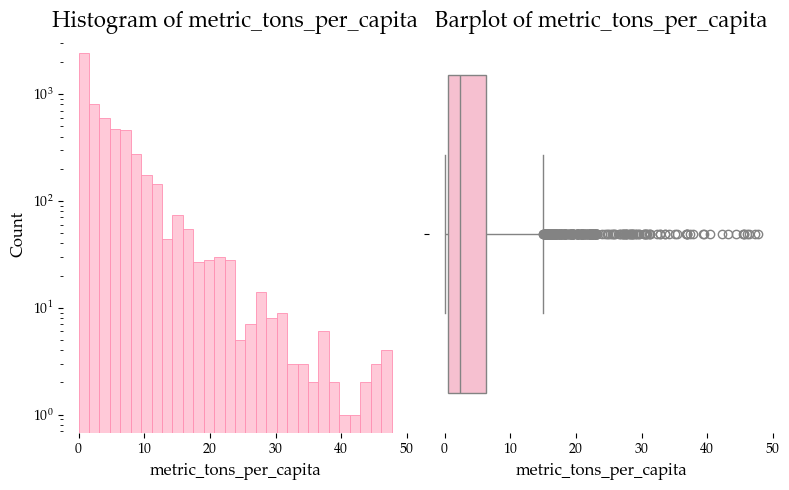

In [241]:
val=df[['kilotons_of_co2','metric_tons_per_capita']]

for i,row in enumerate(val):
    fig,ax=plt.subplots(1,2,sharey=False)
    sns.histplot(data=df,x=row,ax=ax[0],bins=30,color=color[0],edgecolor=color[1])
    ax[0].set_yscale('log') 
    ax[0].set_title(f'Histogram of {row}')
    
    sns.boxplot(data=df,x=row,ax=ax[1],color=color[0])
    ax[1].set_title(f'Barplot of {row}')

    plt.show()
    

Levels of CO2 by countries in kilotons

Text(0.5, 1.0, 'Levels of CO2 by Region in Kilotons')

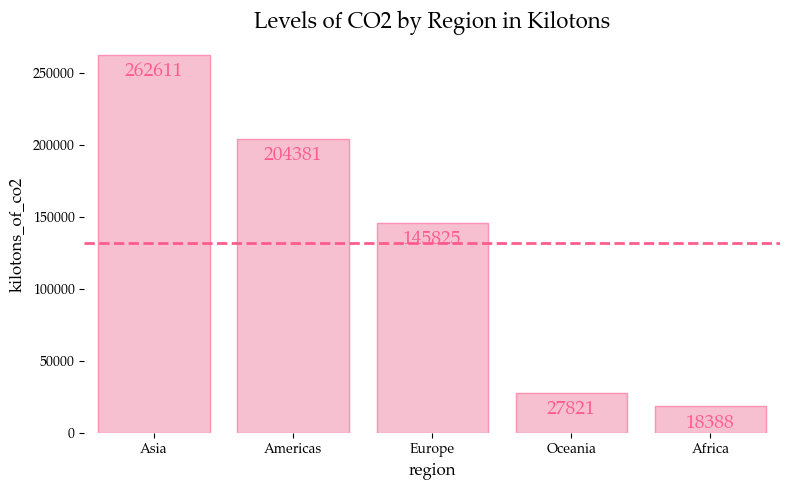

In [243]:
country_by_kt=df.groupby('region')['kilotons_of_co2'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=country_by_kt,x='region',y='kilotons_of_co2',color=color[0],errorbar=None,edgecolor=color[1],linewidth=1)

for i, row in country_by_kt.iterrows():
    plt.text(i,row['kilotons_of_co2']-15000,f'{round(row['kilotons_of_co2'])}',ha='center',color=color[2],fontsize=14)

plt.axhline(country_by_kt['kilotons_of_co2'].mean(),color=color[2], linewidth=2,linestyle='--')
plt.title('Levels of CO2 by Region in Kilotons')

Levels of CO2 by Region in Metric Tons

Text(0.5, 1.0, 'Levels of CO2 by Region in Metric Tons')

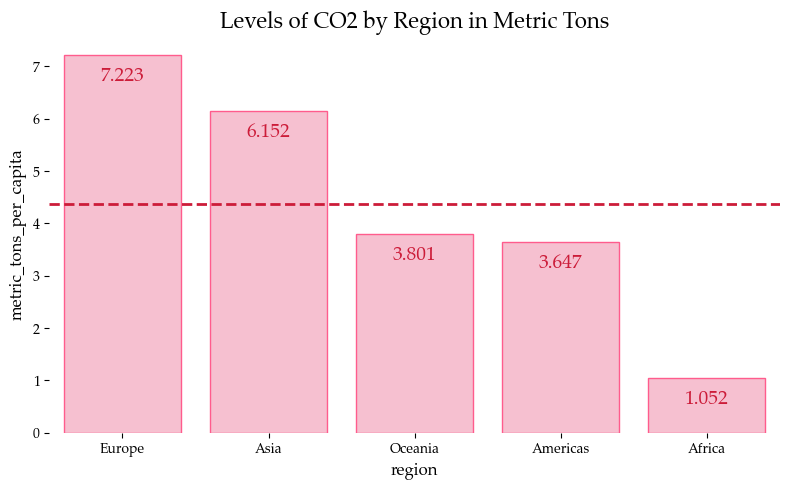

In [247]:
country_by_mt=df.groupby('region')['metric_tons_per_capita'].mean().sort_values(ascending=False).reset_index()

sns.barplot(data=country_by_mt,x='region',y='metric_tons_per_capita',color=color[0],errorbar=None,edgecolor=color[2],linewidth=1)

for i,row in country_by_mt.iterrows():
    plt.text(i,row['metric_tons_per_capita']-0.5, f'{round(row['metric_tons_per_capita'],3)}',ha='center',color=color[3],fontsize=14)

plt.axhline(country_by_mt['metric_tons_per_capita'].mean(),color=color[3], linewidth=2,linestyle='--')

plt.title('Levels of CO2 by Region in Metric Tons')

CO2 Emissions by Region Over the Years

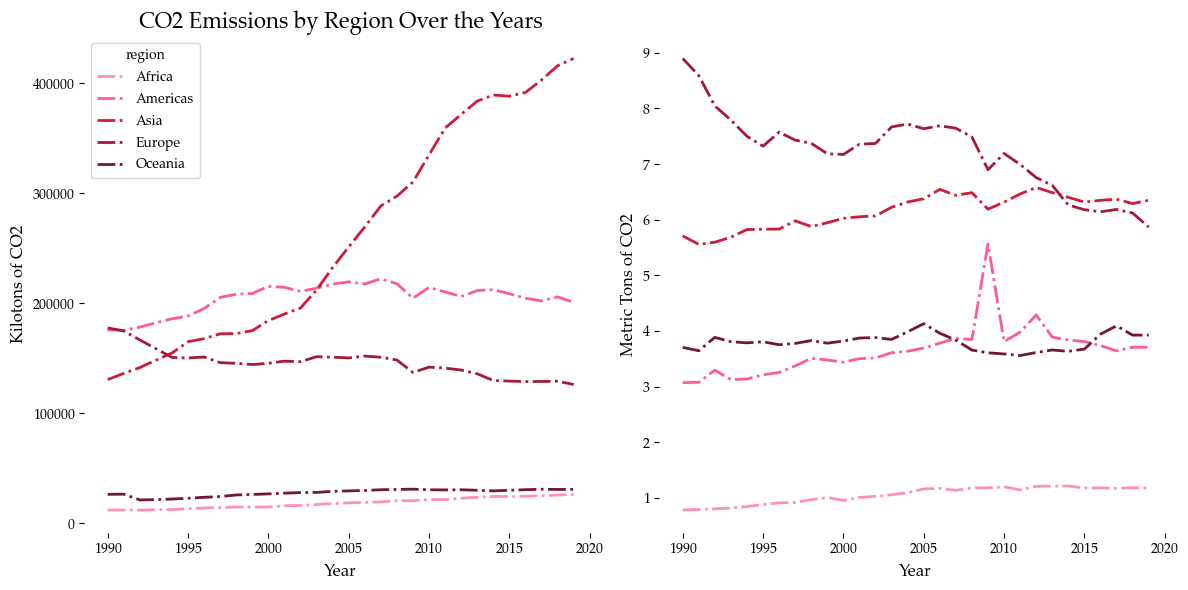

In [278]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

region_year_kt=df.groupby(['region','year'])['kilotons_of_co2'].mean().reset_index().sort_values(by=['region','year'])
#region_year_kt.sort_values(by=['region','year'],inplace=True)
sns.lineplot(data=region_year_kt,x='year',y='kilotons_of_co2',hue='region',palette=color[1:6],linewidth=2,linestyle='-.',ax=ax[0])
 
ax[0].set_title('CO2 Emissions by Region Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Kilotons of CO2')

region_year_mt=df.groupby(['region','year'])['metric_tons_per_capita'].mean().reset_index().sort_values(by=['region','year'])
#region_year_mt.sort_values(by=['region','year'],inplace=True)
sns.lineplot(data=region_year_mt,x='year',y='metric_tons_per_capita',hue='region',palette=color[1:6],linewidth=2,linestyle='-.',ax=ax[1],legend=False)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Metric Tons of CO2')



plt.show()

CO2 Emissions by Region

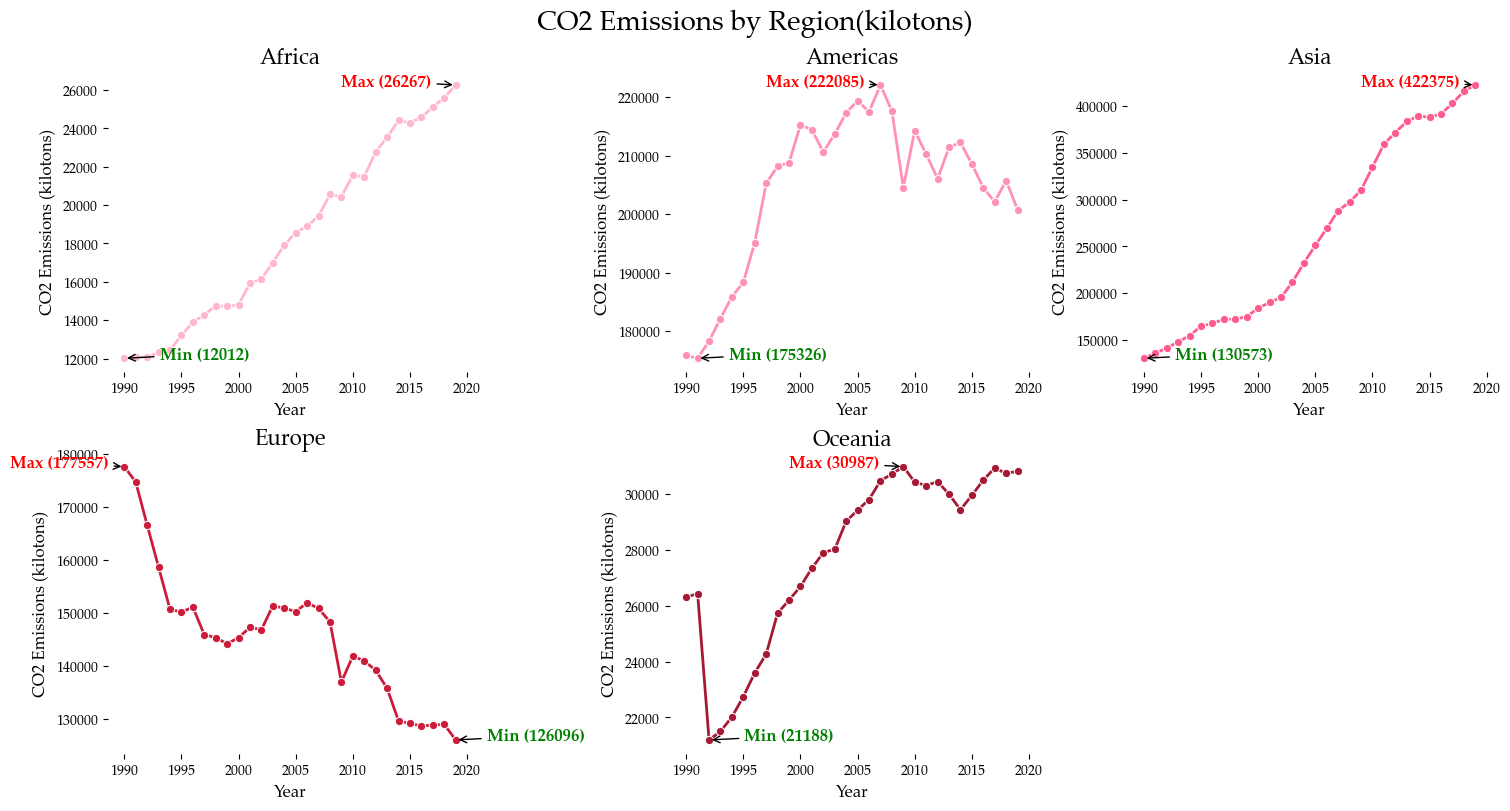

In [254]:
region_year_kt=df.groupby(['region','year'])['kilotons_of_co2'].mean().reset_index().sort_values(by=['region','year'])

regions = region_year_kt['region'].unique()  

ncols=3
nrows=int(np.ceil(len(regions) / ncols))

fig, axes = plt.subplots(
    ncols=ncols,
    nrows = nrows,    
    constrained_layout=True,
    figsize=(15,4*nrows)
)

axes = axes.flatten()  

palette = sns.color_palette(color, len(regions))



for i, region in enumerate(regions):
    region_data = region_year_kt[region_year_kt['region'] == region]  
    ax = axes[i]  

    max_kt=region_data.loc[region_data['kilotons_of_co2'].idxmax()]
    min_kt=region_data.loc[region_data['kilotons_of_co2'].idxmin()]

    sns.lineplot(
        data=region_data,
        x='year',
        y='kilotons_of_co2',
        marker='o',  
        linewidth=2,
        color=palette[i], 
        ax=ax
    )

    ax.annotate(
        text=f'Max ({round(max_kt['kilotons_of_co2'])})',  
        xy=(max_kt['year'], max_kt['kilotons_of_co2']),  
        xytext=(max_kt['year']-10 , max_kt['kilotons_of_co2']),  
        arrowprops=dict(facecolor='black', arrowstyle='->'), 
        fontsize=12, color='red', fontweight='bold'  
    )

    ax.annotate(
        text=f'Min ({round(min_kt['kilotons_of_co2'])})',
        xy=(min_kt['year'],min_kt['kilotons_of_co2']),
        xytext=(min_kt['year']+7,min_kt['kilotons_of_co2']),
        ha='center',
        arrowprops=dict(facecolor='black', arrowstyle='->'),  
        fontsize=12, color='green', fontweight='bold'
    )

    ax.set_title(region)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 Emissions (kilotons)')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('CO2 Emissions by Region(kilotons)')
plt.show()

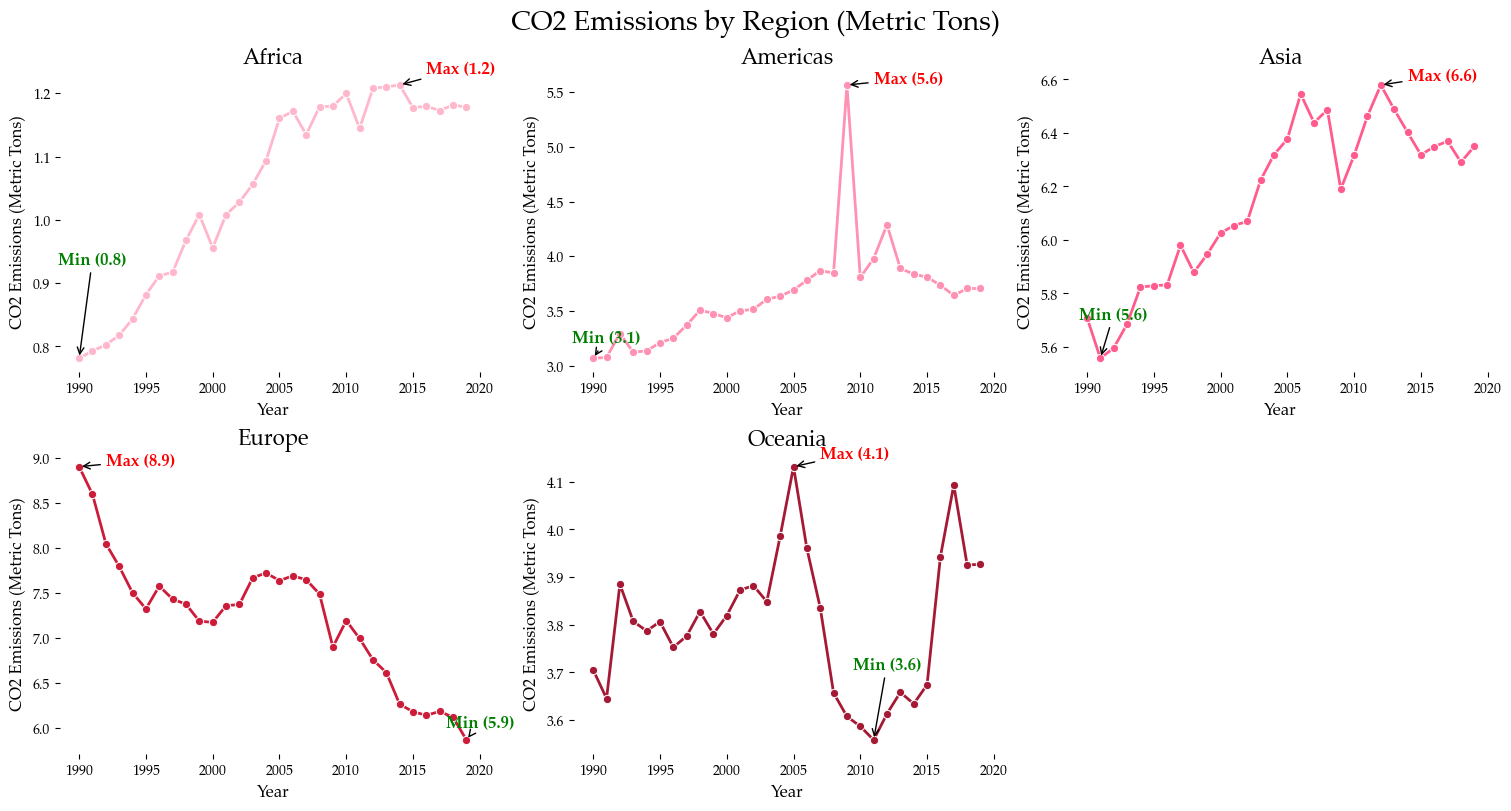

In [255]:
region_year_mt=df.groupby(['region','year'])['metric_tons_per_capita'].mean().reset_index().sort_values(by=['region','year'])

regions = region_year_kt['region'].unique()  

ncols=3
nrows=int(np.ceil(len(regions) / ncols))

palette = sns.color_palette(color, len(regions))

fig, axes = plt.subplots(
    ncols=ncols,
    nrows = nrows,    
    constrained_layout=True,
    figsize=(15,4*nrows),
)
axes=axes.flatten()






for i, region in enumerate(regions):
    region_date=region_year_mt[region_year_mt['region']==region]
    
    sns.lineplot(
        data=region_date,
        x='year',
        y='metric_tons_per_capita',
        color=palette[i],
        linewidth=2,
        marker='o',
        ax=axes[i] ,)

    max_met=region_date.loc[region_date['metric_tons_per_capita'].idxmax()]
    min_met=region_date.loc[region_date['metric_tons_per_capita'].idxmin()]
    
    axes[i].annotate(
        text=f'Max ({round(max_met['metric_tons_per_capita'],1)})',  
        xy=(max_met['year'], max_met['metric_tons_per_capita']),  
        xytext=(max_met['year'] + 2, max_met['metric_tons_per_capita']+0.02 ),  
        arrowprops=dict(facecolor='black', arrowstyle='->'),  
        fontsize=12, color='red', fontweight='bold'  
    )

    axes[i].annotate(
        text=f'Min ({round(min_met['metric_tons_per_capita'],1)})',
        xy=(min_met['year'],min_met['metric_tons_per_capita']),
        xytext=(min_met['year']+1,min_met['metric_tons_per_capita']+0.15),
        ha='center',
        arrowprops=dict(facecolor='black', arrowstyle='->'),  
        fontsize=12, color='green', fontweight='bold'
    )
    
    axes[i].set_title(region)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('CO2 Emissions (Metric Tons)')
    region_date

for j in range(i+1,len(axes)):
    plt.delaxes(axes[j])
    
fig.suptitle('CO2 Emissions by Region (Metric Tons)')
plt.show()

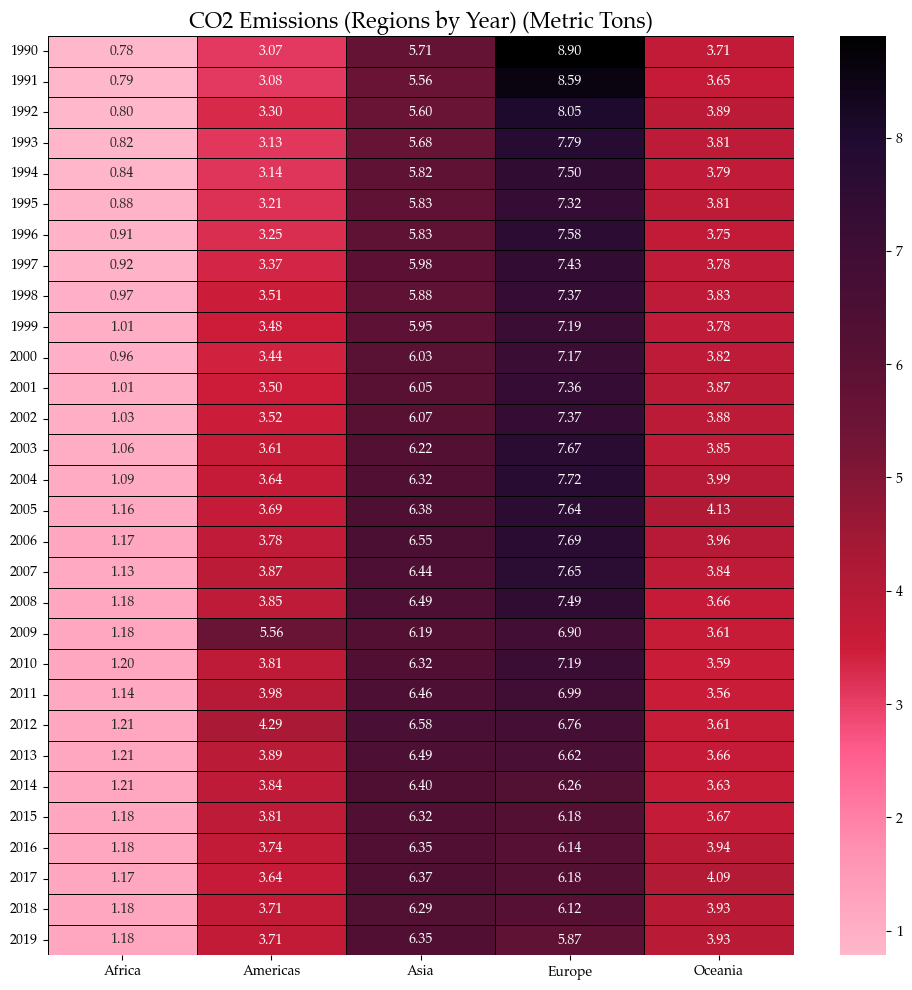

In [256]:
plt.figure(figsize=(10,10))
pivot_metrix=region_year_mt.pivot(index='year',columns='region',values='metric_tons_per_capita')
sns.heatmap(pivot_metrix,cmap=custom_cmap,annot=True,linewidth=0.5,linecolor='k',fmt='1.2f',)
plt.title('CO2 Emissions (Regions by Year) (Metric Tons)')
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=00)
plt.show()

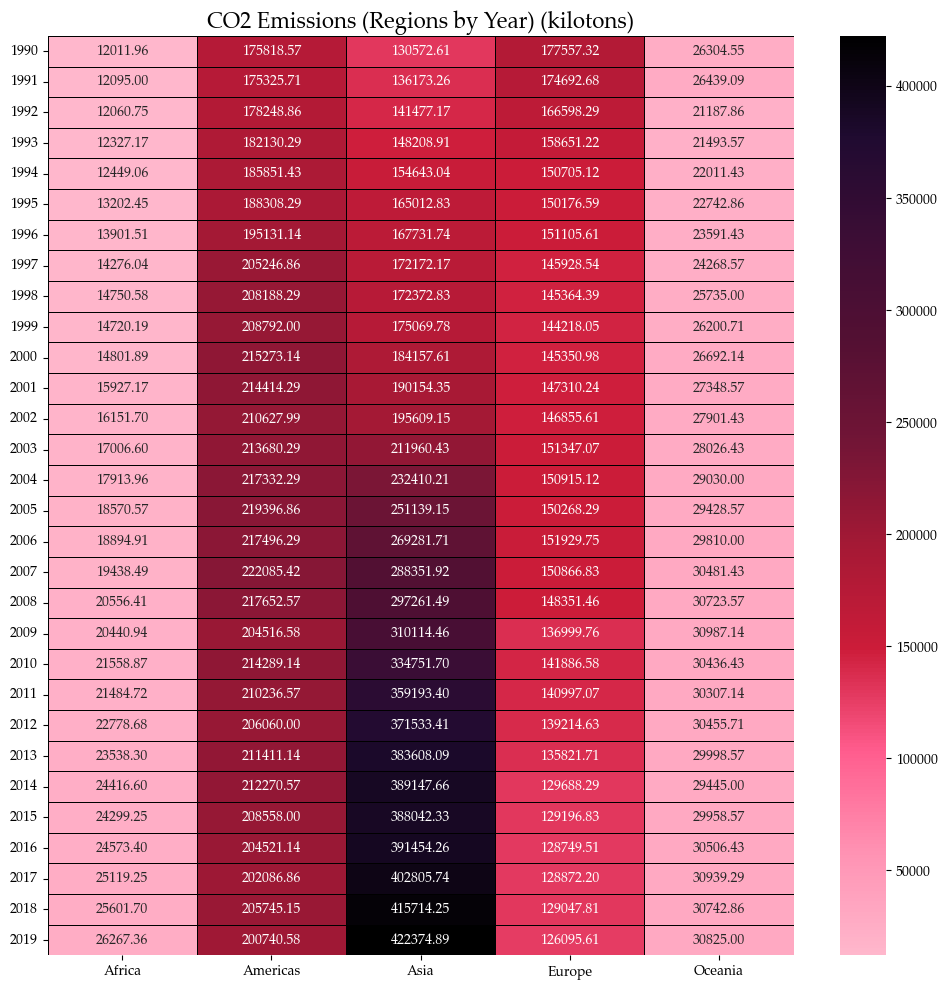

In [257]:
plt.figure(figsize=(10,10))
pivot_kilotons=region_year_kt.pivot(index='year',columns='region',values='kilotons_of_co2')
sns.heatmap(pivot_kilotons,cmap=custom_cmap,annot=True,linewidth=0.5,linecolor='k',fmt='1.2f',)
plt.title('CO2 Emissions (Regions by Year) (kilotons)')
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=00)
plt.show()

Total CO2 Emissions (Kilotons)

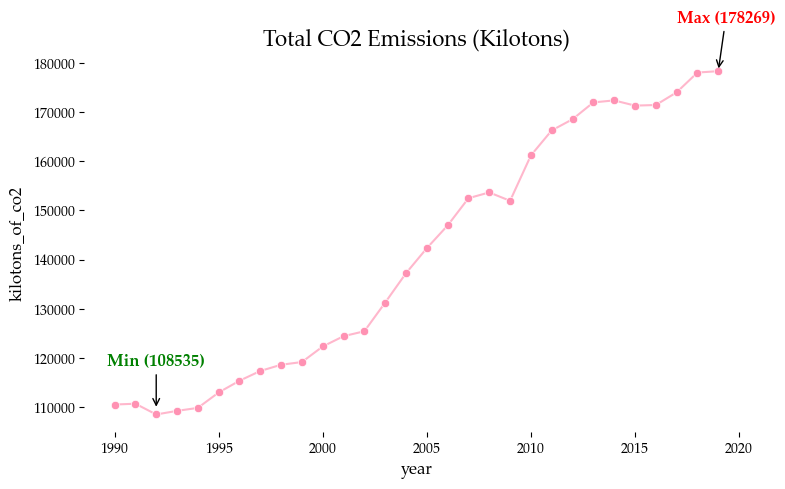

In [259]:
group_year=df.groupby('year')['kilotons_of_co2'].mean().reset_index()
max_co2 = group_year.loc[group_year['kilotons_of_co2'].idxmax()]
min_co2 = group_year.loc[group_year['kilotons_of_co2'].idxmin()]


sns.lineplot(data=group_year,x='year',y='kilotons_of_co2',markers='*',color=color[0])
sns.scatterplot(data=group_year,x='year',y='kilotons_of_co2',color=color[1],zorder=2)


plt.annotate(
    text=f'Max ({round(max_co2['kilotons_of_co2'])})',  
    xy=(max_co2['year'], max_co2['kilotons_of_co2']),  
    xytext=(max_co2['year'] - 2, max_co2['kilotons_of_co2'] + 10000),  
    arrowprops=dict(facecolor='black', arrowstyle='->'),  
    fontsize=12, color='red', fontweight='bold'  
)

plt.annotate(
    text=f'Min ({round(min_co2['kilotons_of_co2'])})',  
    xy=(min_co2['year'], min_co2['kilotons_of_co2']+1000),  
    ha='center',
    xytext=(min_co2['year'] , min_co2['kilotons_of_co2'] + 10000),  
    arrowprops=dict(facecolor='black', arrowstyle='->'),  
    fontsize=12, color='green', fontweight='bold'  
)

plt.title('Total CO2 Emissions (Kilotons)')
plt.show()


Total CO2 Emissions (Metric Tons)

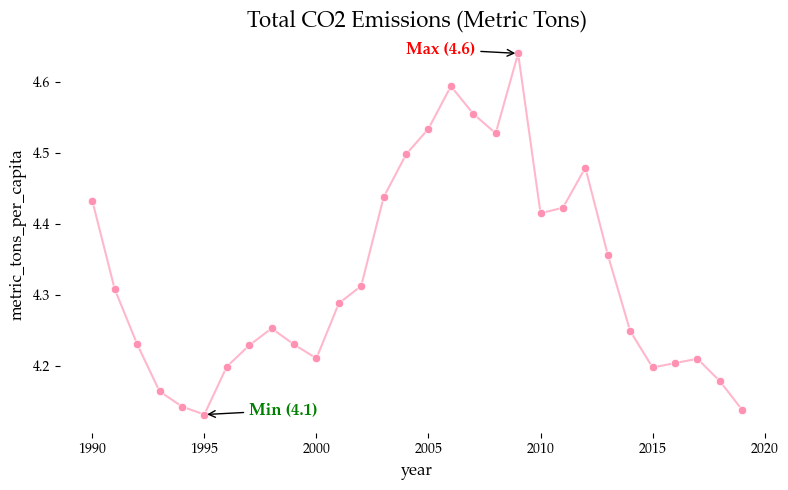

In [261]:
group_year=df.groupby('year')['metric_tons_per_capita'].mean().reset_index()
max_co2 = group_year.loc[group_year['metric_tons_per_capita'].idxmax()]
min_co2 = group_year.loc[group_year['metric_tons_per_capita'].idxmin()]


sns.lineplot(data=group_year,x='year',y='metric_tons_per_capita',markers='*',color=color[0])
sns.scatterplot(data=group_year,x='year',y='metric_tons_per_capita',color=color[1],zorder=2)


plt.annotate(
    text=f'Max ({round(max_co2['metric_tons_per_capita'],1)})',  
    xy=(max_co2['year'], max_co2['metric_tons_per_capita']),  
    xytext=(max_co2['year'] - 5, max_co2['metric_tons_per_capita'] ),
    arrowprops=dict(facecolor='black', arrowstyle='->'), 
    fontsize=12, color='red', fontweight='bold'  
)

plt.annotate(
    text=f'Min ({round(min_co2['metric_tons_per_capita'],1)})',  
    xy=(min_co2['year'], min_co2['metric_tons_per_capita']),  
    xytext=(min_co2['year'] +2, min_co2['metric_tons_per_capita'] ),  
    arrowprops=dict(facecolor='black', arrowstyle='->'),  
    fontsize=12, color='green', fontweight='bold'  
)

plt.title('Total CO2 Emissions (Metric Tons)')

plt.show()

Top 10 countries with the highest CO2 emissions by region

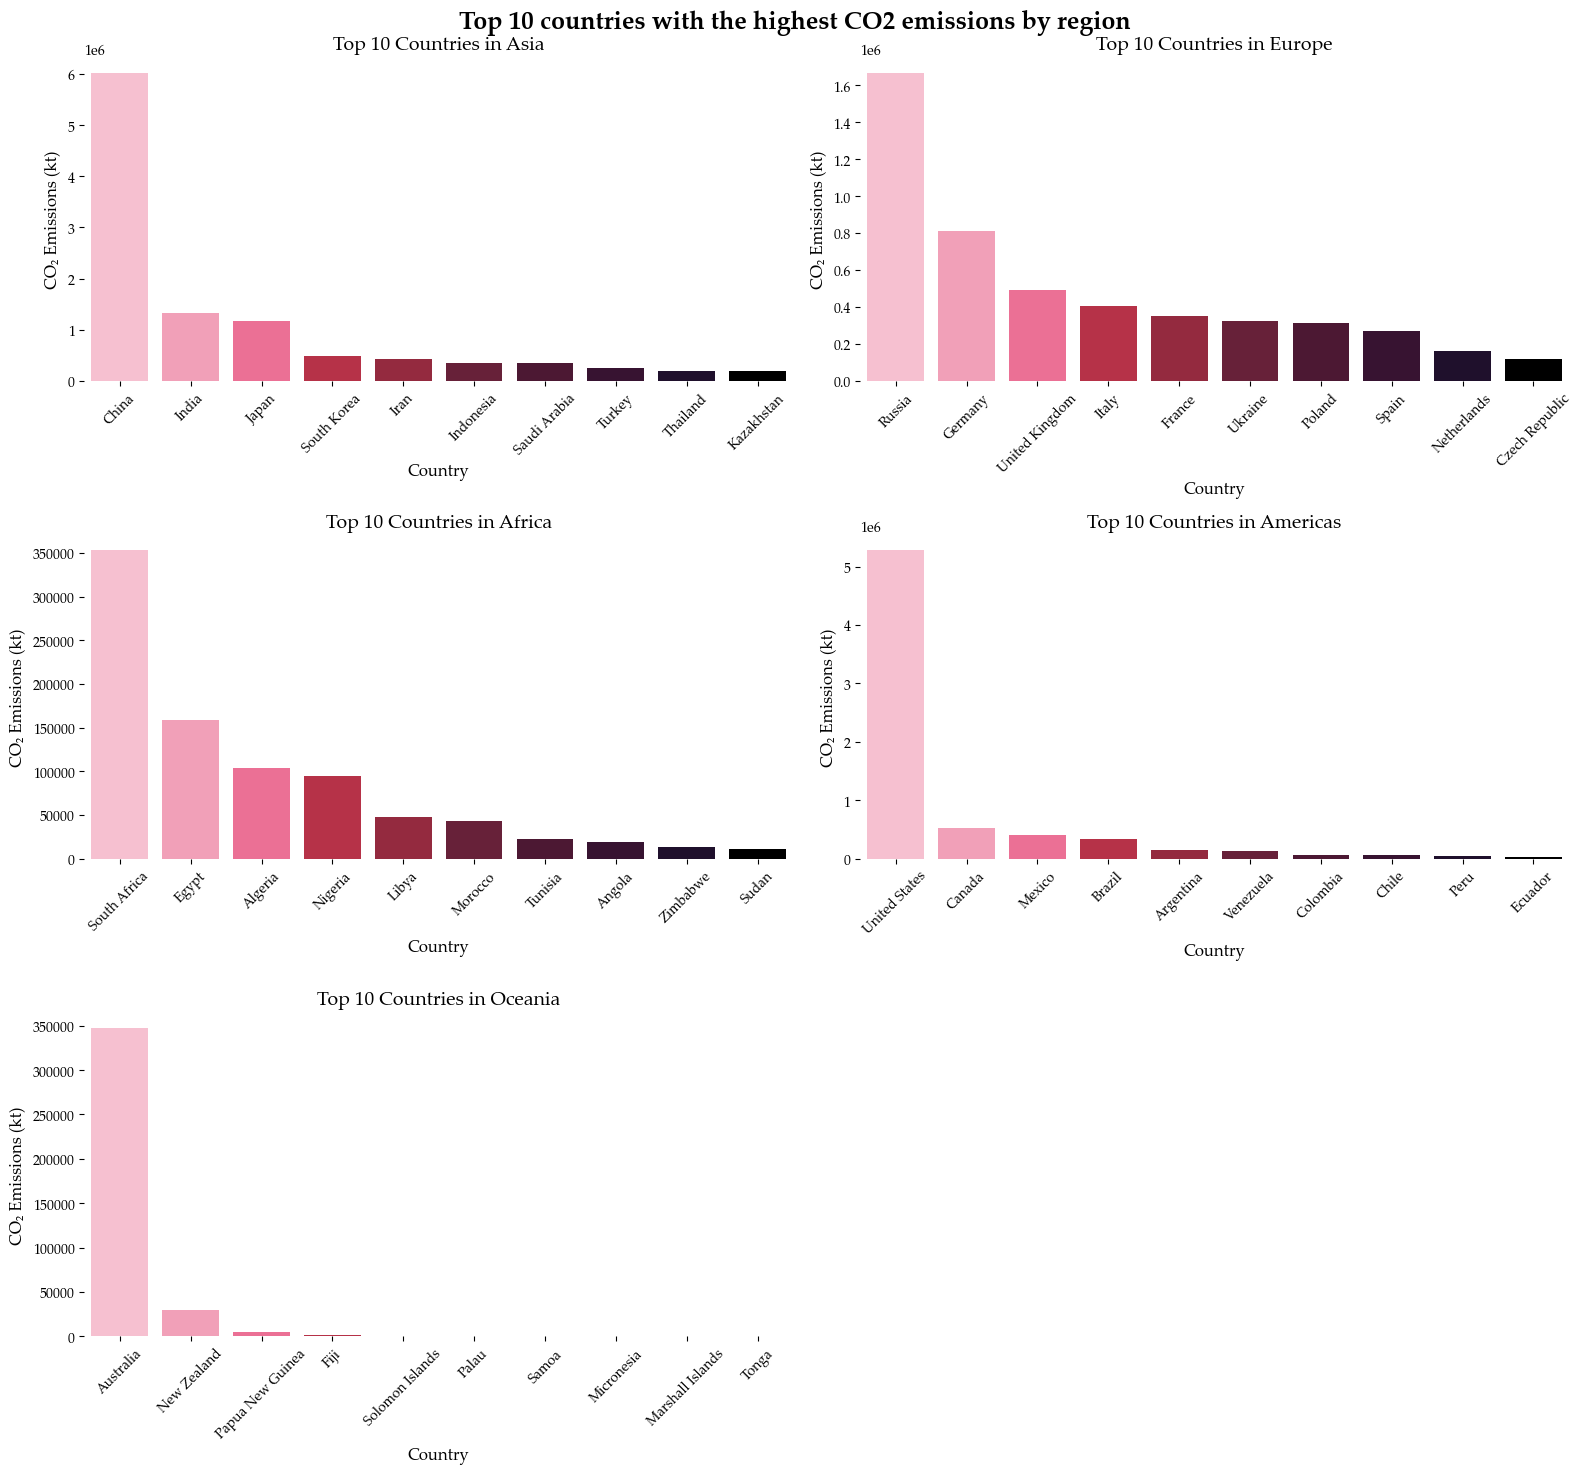

In [264]:
region=df['region'].unique()
top10_country_by_region_kt = (df.groupby(['region','country'])['kilotons_of_co2']
                           .mean()
                           .reset_index()
                           .sort_values(by=['region','kilotons_of_co2'],ascending=[True,False])
                           .groupby('region')
                           .head(10)
                          )
    
region_num=len(region)
col=2
rows=int(np.ceil(region_num/col))
fig,ax=plt.subplots(rows,col,figsize=(16,rows*5))
ax = ax.flatten() 

for i, region_name in enumerate(region):
 
    if i >= len(ax):
        print("Too many Regions.")
        break

    
    region_data = top10_country_by_region_kt[top10_country_by_region_kt['region'] == region_name]



    
    sns.barplot(data=region_data, x='country', y='kilotons_of_co2', ax=ax[i],hue='country',palette = color)
    ax[i].set_title(f"Top 10 Countries in {region_name}", fontsize=14)
    ax[i].set_xlabel("Country", fontsize=12)
    ax[i].set_ylabel("CO₂ Emissions (kt)", fontsize=12)
    ax[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.suptitle("Top 10 countries with the highest CO2 emissions by region", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()
    

Top 10 countries with the lowest CO2 emissions by region

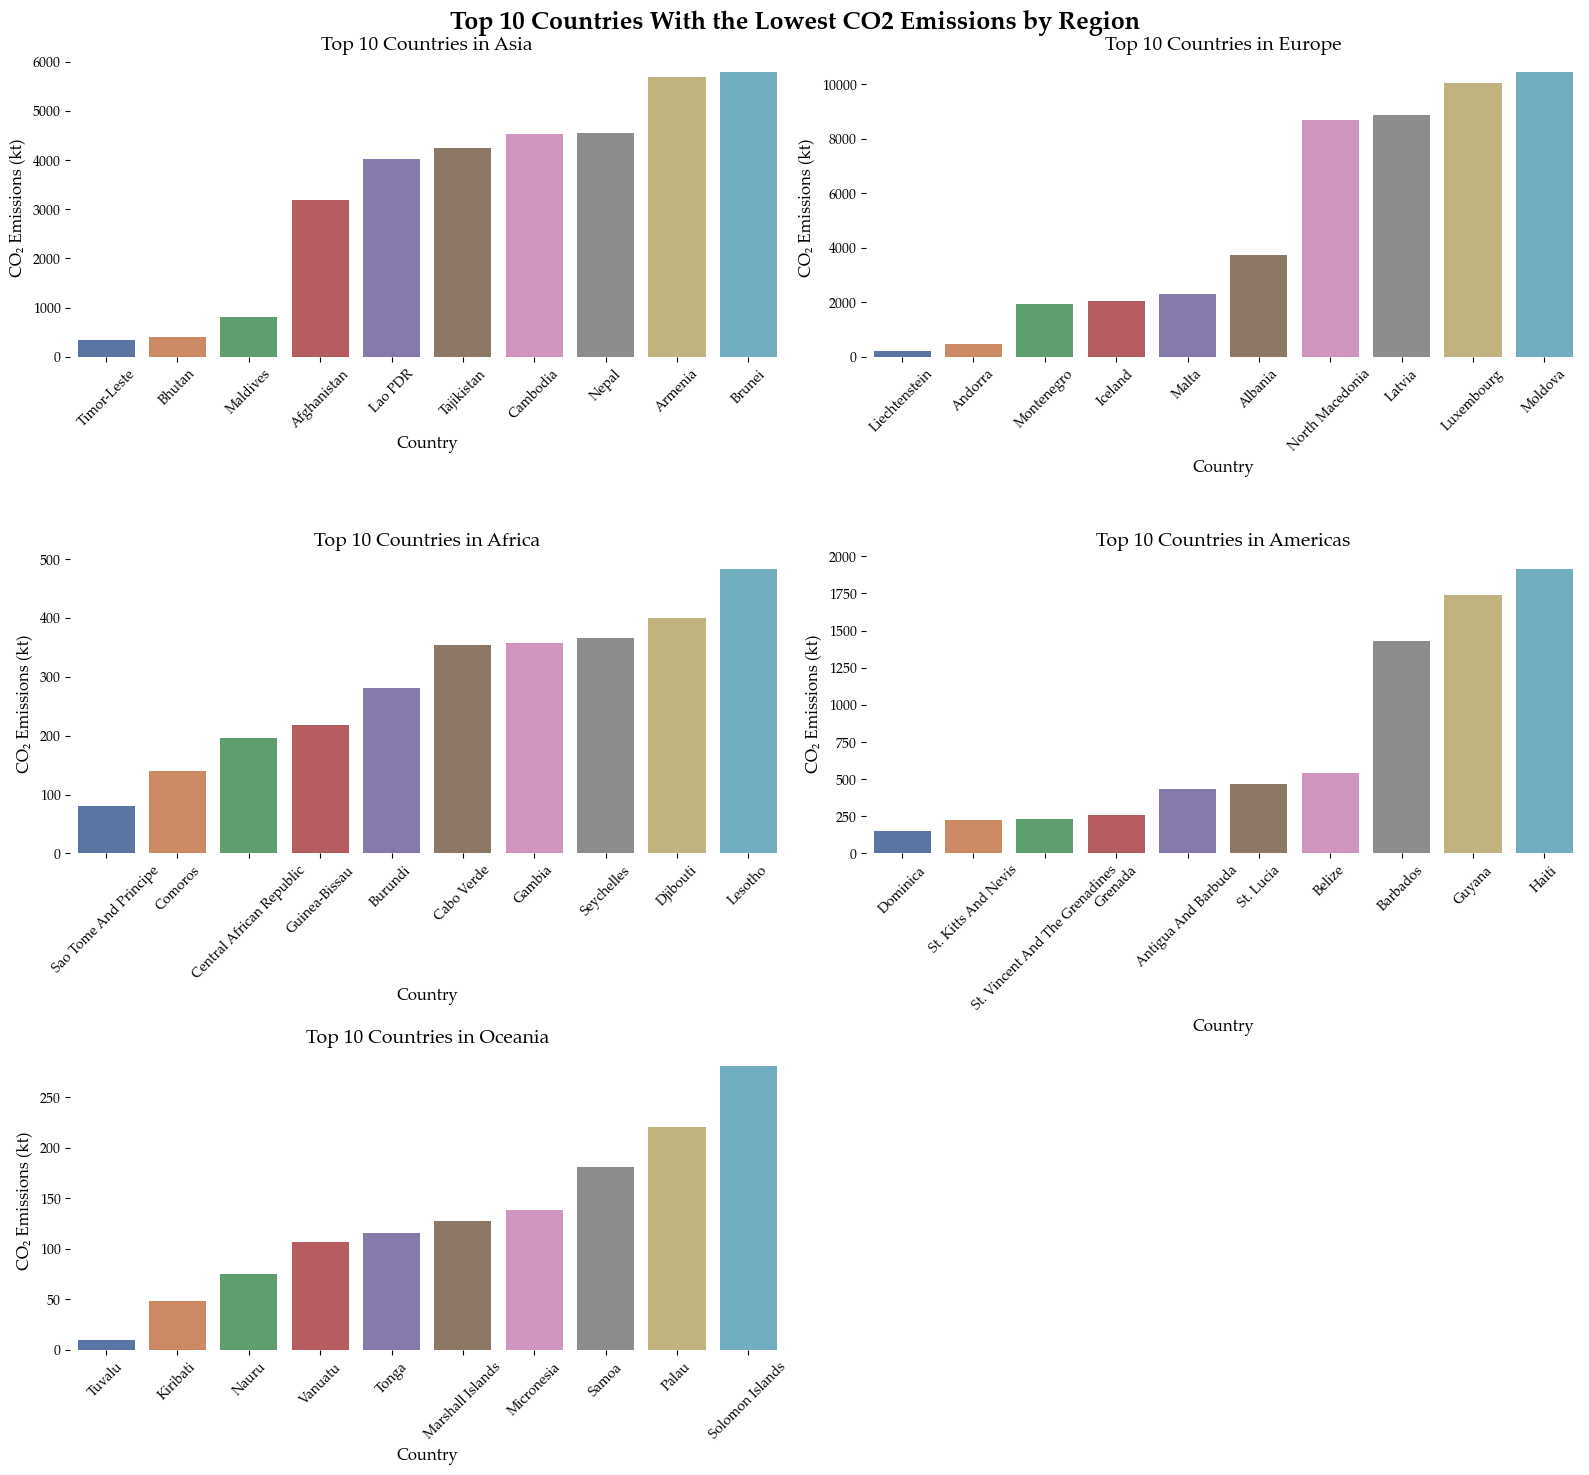

In [218]:
region=df['region'].unique()


top10_lowest_co2_by_regions=(df.groupby(['region','country'])['kilotons_of_co2']
                            .mean()
                            .reset_index()
                            .sort_values(by=['region','kilotons_of_co2'],ascending=[True,True])
                            .groupby('region')
                            .head(10))

region_num=len(region)
col=2
rows=int(np.ceil(region_num/col))

fig,ax=plt.subplots(rows,col,figsize=(16,rows*5))
ax=ax.flatten()

for i, row in enumerate(region):

  

    region_data=top10_lowest_co2_by_regions[top10_lowest_co2_by_regions['region']==row]

      


    sns.barplot(data=region_data,x='country',y='kilotons_of_co2',ax=ax[i],hue='country', palette=color)
    ax[i].set_title(f"Top 10 Countries in {row}", fontsize=14)
    ax[i].set_xlabel("Country", fontsize=12)
    ax[i].set_ylabel("CO₂ Emissions (kt)", fontsize=12)
    ax[i].tick_params(axis='x', rotation=45)




for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
plt.suptitle("Top 10 Countries With the Lowest CO2 Emissions by Region", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()
